# Workshop week 6: Deep Learning and Reinforcement Learning

## 1. MNIST dataset classification using CNN

In Week 11 you learned that Convolutional Neural Network (CNN) is a neural network architecture used to classify images. <br>
In this activity, you will learn how to apply CNN to recognise hand-written digits to classify them into 0-9 digits.<br>
This is a simple version of a much larger application that converts handwriting into computer recognised text.

Before starting this task, please refresh your knowledge from Week 11 Online Learning and lecture.


### Activity 1: Creating CNN for image classification

In this activity, you will create a configuration of CNN as specfied. Please complete the code in the indicated places. You can work in groups and consult each other on how to do it efficiently. Keras APIs documentation can be found here: https://keras.io/api/.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 731c5ac602752760c8e48fbffcf8c3b850d9dc2a2aedcf2cc48468fc17b673d1 so we will re-download the data.
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


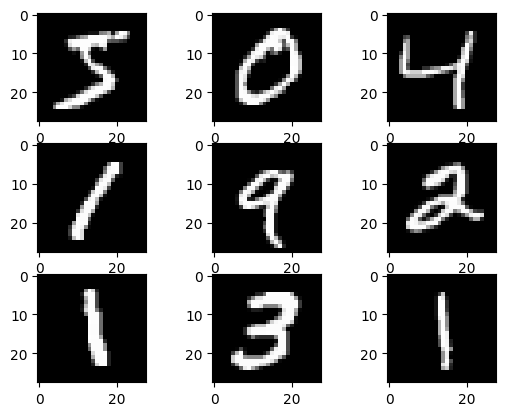

In [2]:
# load the dataset and plot the first 9 digints
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [3]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [4]:
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    
    return trainX, trainY, testX, testY

In [5]:
# scale pixels
def prep_pixels(train, test):

    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    
    # return normalized images
    return train_norm, test_norm

In [8]:
""""
    define 
    convolution 2D layer with:
        32 filters
        3x3 filter size
        relu activation
        default stride
        Make sure the input_shape follows actual data shape you are going to fit  
    pooling layer with 2x2 size and default stride
    flatten the image before it goes to fully connected NN
    2 fully connected NN: 
        one with 100 neurons and relu activation
        second one with 10 neurons and softmax activation
    compile the model with 
        SGD optimiser with
            learnign rate = 0.01 
            momentum = 0.9, 
        categorical cross-entropy loss function
        accuracy metric
"""

def define_model():
    model = Sequential()
    # your code here
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    optimizer = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [10]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='green', label='test')
        # plot accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='green', label='test')
        plt.tight_layout()
    plt.show()

> 98.183
> 98.508
> 98.508
> 98.767
> 98.508


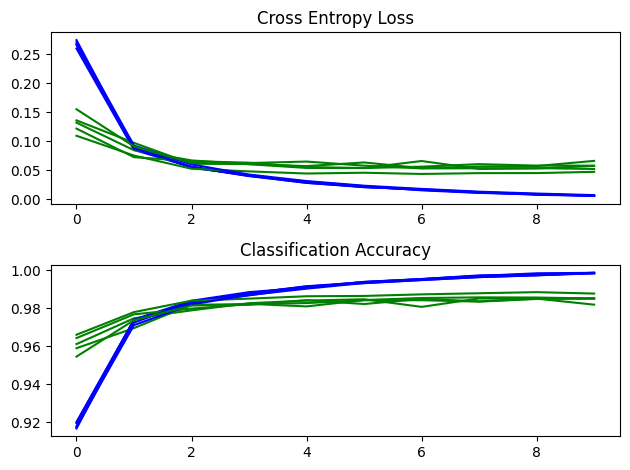

In [11]:
# run the test harness for evaluating a model
# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# evaluate model
scores, histories = evaluate_model(trainX, trainY)
# learning curves
summarize_diagnostics(histories)

### Activity 2: Discuss the results

Analyse the output charts and answer the following questions:
1. What would be the number of epochs sufficient to obtain good classification results?
2. What CNN parameters would you change to improve results?

Your workshop instructor may have some more questions to discuss.

## 2. Reinforcement Learning

Reinforcement learning (RL) is a subset of machine learning that allows an AI-driven system (sometimes referred to as an agent) to learn through trial and error using feedback from its actions.

One example is Q-Learning. Q-learning is a machine learning approach that enables a model to iteratively learn and improve over time by taking the correct action. 

### Activity 3: Read the following article and answer the below questions. 

Article: https://www.techtarget.com/searchenterpriseai/definition/Q-learning


1. Describe the components involved in reinforcement learning, such as agents, states, actions, rewards, episodes, and Q-values.
2. How does the off-policy approach work in Q-learning, and what role do Q-values play in achieving this approach?
3. What is a Q-table, and how is it utilized in reinforcement learning?
4. Explain the relationship between the Q-table and the Q-function in the context of reinforcement learning.
5. What are the advantages of using a Q-learning approach in reinforcement learning?
